In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [9]:
container_data = pd.read_csv("data/containers.csv")
port_data = pd.read_csv("data/ports.csv")
ship_data = pd.read_csv("data/ships.csv")


# Convert arrival_time and departure_time to datetime objects
ship_data['arrival_time'] = pd.to_datetime(ship_data['arrival_time'])
ship_data['departure_time'] = pd.to_datetime(ship_data['departure_time'])


In [10]:
# Filter ships that are currently in transit
# For demonstration, we'll assume we want to check the ships within a predefined range of time
# Replace these with your specific conditions if necessary
for index, ship in ship_data.iterrows():
    if ship['arrival_time'] < ship['departure_time']:  # Ship is in transit
        print(f"Processing Ship ID: {ship['ship_id']}")

        # Time available for unloading and loading
        available_time = (ship['departure_time'] - ship['arrival_time']).total_seconds()  # in seconds
        print(f"Available time for operations: {available_time} seconds")
        
        # Example logic for loading/unloading
        containers_to_unload = min(ship['max_capacity'] - ship['empty_slots'], 5)  # Unload up to 5 or max available
        print(f"Unloading {containers_to_unload} containers.")

        # Update ship's empty_slots
        ship['empty_slots'] += containers_to_unload
        print(f"Updated empty slots: {ship['empty_slots']}")

        # Load new containers (for example purposes, let's load 3 new containers)
        containers_to_load = min(ship['empty_slots'], 3)
        ship['empty_slots'] -= containers_to_load
        print(f"Loading {containers_to_load} new containers. Updated empty slots: {ship['empty_slots']}\n")


Processing Ship ID: S0423309
Available time for operations: 404302.0 seconds
Unloading 5 containers.
Updated empty slots: 5
Loading 3 new containers. Updated empty slots: 2

Processing Ship ID: S2610075
Available time for operations: 237161.0 seconds
Unloading 5 containers.
Updated empty slots: 27
Loading 3 new containers. Updated empty slots: 24

Processing Ship ID: S4484524
Available time for operations: 162896.0 seconds
Unloading 5 containers.
Updated empty slots: 21
Loading 3 new containers. Updated empty slots: 18

Processing Ship ID: S9878073
Available time for operations: 397608.0 seconds
Unloading 5 containers.
Updated empty slots: 18
Loading 3 new containers. Updated empty slots: 15

Processing Ship ID: S3288956
Available time for operations: 313141.0 seconds
Unloading 5 containers.
Updated empty slots: 20
Loading 3 new containers. Updated empty slots: 17

Processing Ship ID: S6061956
Available time for operations: 453227.0 seconds
Unloading 5 containers.
Updated empty slots: 

In [4]:
# Rewrite Shipyard Simulation Code

class ShipyardSimulation:
    def __init__(self, synthetic_data, num_runs, time_frame):
        self.synthetic_data = synthetic_data  # Load synthetic data
        self.num_runs = num_runs
        self.time_frame = time_frame  # Total time available for operations
        self.results = []

    def load_container(self):
        # Select a random loading time from synthetic data
        return np.random.choice(self.synthetic_data['loading_time'])

    def unload_container(self):
        # Select a random unloading time from synthetic data
        return np.random.choice(self.synthetic_data['unloading_time'])

    def run_single_simulation(self):
        total_time = 0
        containers_loaded = 0
        containers_unloaded = 0
        
        # Continue loading and unloading until time runs out
        while total_time < self.time_frame:
            # Randomly decide whether to load or unload
            if random.choice([True, False]):  # Randomly decide action
                load_time = self.load_container()
                if total_time + load_time <= self.time_frame:
                    total_time += load_time
                    containers_loaded += 1
            else:
                unload_time = self.unload_container()
                if total_time + unload_time <= self.time_frame:
                    total_time += unload_time
                    containers_unloaded += 1

        return containers_loaded, containers_unloaded

    def run_simulations(self):
        for _ in range(self.num_runs):
            containers_loaded, containers_unloaded = self.run_single_simulation()
            self.results.append((containers_loaded, containers_unloaded))

    def visualize_results(self):
        loaded, unloaded = zip(*self.results)  # Unzip results into two lists

        plt.figure(figsize=(12, 6))

        # Plot number of containers loaded
        plt.subplot(1, 2, 1)
        plt.hist(loaded, bins=30, color='skyblue', edgecolor='black')
        plt.title('Histogram of Containers Loaded')
        plt.xlabel('Containers Loaded')
        plt.ylabel('Frequency')

        # Plot number of containers unloaded
        plt.subplot(1, 2, 2)
        plt.hist(unloaded, bins=30, color='salmon', edgecolor='black')
        plt.title('Histogram of Containers Unloaded')
        plt.xlabel('Containers Unloaded')
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()

# Example usage
# Assuming your synthetic data is stored in a CSV file and contains 'loading_time' and 'unloading_time' columns
num_simulations = 1000
time_frame = 300  # Define the time frame for operations (in seconds)
simulation = ShipyardSimulation(ship_data, num_runs = num_simulations, time_frame = time_frame)
simulation.run_simulations()
simulation.visualize_results()

KeyError: 'loading_time'

In [16]:
class ShipyardSimulation:
    def __init__(self, num_runs):
        self.num_runs = num_runs
        self.results = []

    def load_container(self, container_type):
        load_time = np.random.exponential(scale=5) # Example average loading time
        return load_time

    def unload_container(self, container_type):
        unload_time = np.random.exponential(scale=5) # Example average unloading time
        return unload_time

    def run_single_simulation(self):
        total_time = 0
        containers_to_load = random.randint(5, 20)  # Random number of containers
        for _ in range(containers_to_load):
            load_time = self.load_container("standard")
            total_time += load_time
            unload_time = self.unload_container("standard")
            total_time += unload_time
        return total_time

    def run_simulations(self):
        for _ in range(self.num_runs):
            total_time = self.run_single_simulation()
            self.results.append(total_time)

    def visualize_results(self):
        # Histogram
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 3, 1)
        plt.hist(self.results, bins=30, color='skyblue', edgecolor='black')
        plt.title('Histogram of Total Operation Times')
        plt.xlabel('Total Time')
        plt.ylabel('Frequency')

        # Box Plot
        plt.subplot(1, 3, 2)
        sns.boxplot(data=self.results)
        plt.title('Box Plot of Total Operation Times')
        plt.ylabel('Total Time')

        # CDF
        plt.subplot(1, 3, 3)
        sorted_results = np.sort(self.results)
        yvals = np.arange(1, len(sorted_results) + 1) / len(sorted_results)
        plt.plot(sorted_results, yvals, marker='.', linestyle='none')
        plt.title('Cumulative Distribution Function (CDF)')
        plt.xlabel('Total Time')
        plt.ylabel('Cumulative Probability')

        plt.tight_layout()
        plt.show()

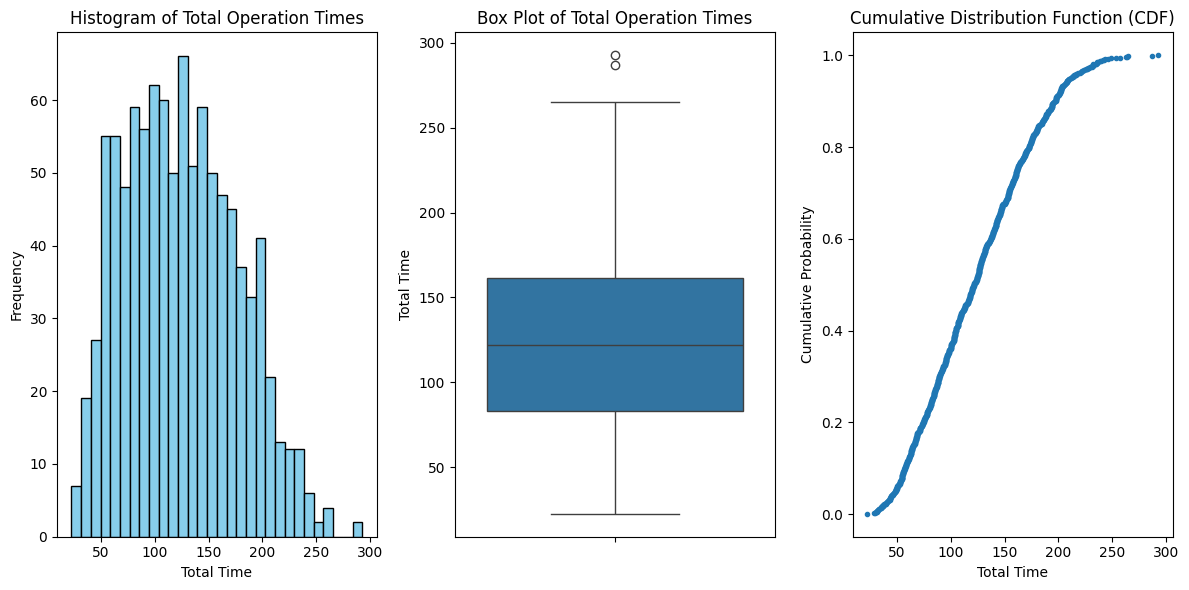

In [17]:
# Example usage
num_simulations = 1000
simulation = ShipyardSimulation(num_runs=num_simulations)
simulation.run_simulations()
simulation.visualize_results()